# 實作股價K線圖
台積電 TSMC (2330) <br>
聯發科 MediaTek (2454) 

In [9]:
import pandas as pd
import datetime as dt
import pandas_datareader as pdr
import requests

headers = {"Accept": "application/json",
           'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
           "Accept-Encoding": "none",
           "Accept-Language": "en-US,en;q = 0.8",
           "Connection": "keep-alive",
           "Referer": "https://cssspritegenerator.com",
           "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML,like Gecko) Chrome / 23.0.1271.64Safari / 537.11"
}
 
with requests.Session() as s:
    print(s.headers)
    s.headers = headers
    print(s.headers)
 
start = dt.datetime(2021, 5, 1)
end = dt.datetime(2021, 7, 1)
df_2330 = pdr.DataReader('AAPL', 'yahoo', start=start, end=end, session=s)
#df_2454= pdr.DataReader('2454.TW', 'yahoo', start=start, end=end, session=s)
df_2330.head()
#list(df_2330["Close"].rolling(10).max())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-30,133.559998,131.070007,131.779999,131.460007,109839500.0,131.040756
2021-05-03,134.070007,131.830002,132.039993,132.539993,75135100.0,132.117294
2021-05-04,131.490005,126.699997,131.190002,127.849998,137564700.0,127.442261
2021-05-05,130.449997,127.970001,129.199997,128.100006,84000900.0,127.691475
2021-05-06,129.750000,127.129997,127.889999,129.740005,78128300.0,129.326233


### 台積電 VS 聯發科 股價線圖

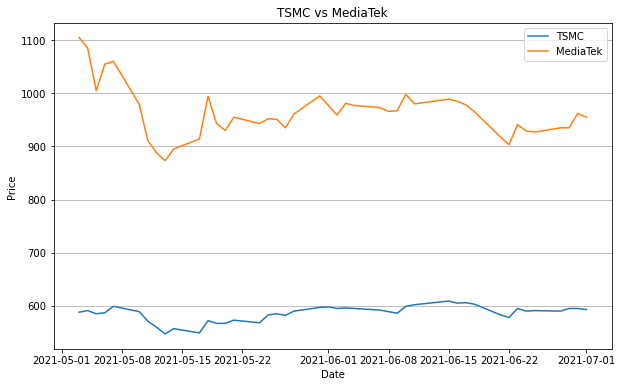

In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize=(10,6))
plt.plot(df_2330.Close, label='TSMC')
plt.plot(df_2454.Close, label='MediaTek')
plt.title('TSMC vs MediaTek',loc='center')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True, axis='y')
plt.legend()
plt.show()

### 台積電股價K線圖
繪製股價圖表套件 mplfinance <br>
Github 網址：https://github.com/matplotlib/mplfinance

In [3]:
! pip install mplfinance

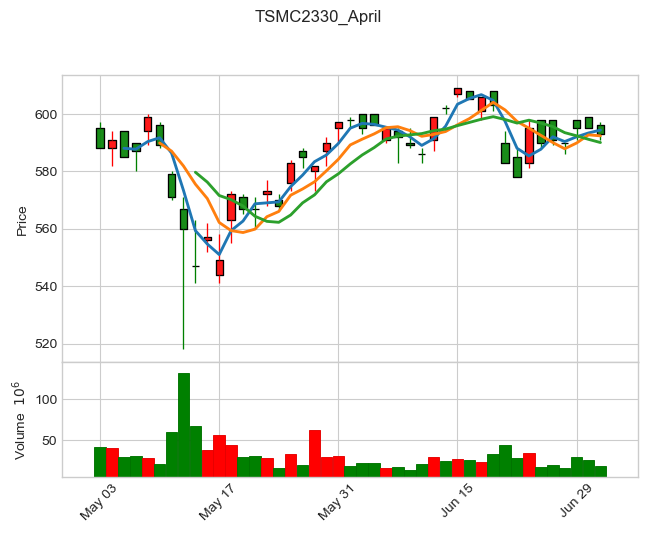

In [9]:
import mplfinance as mpf
import matplotlib as mpl
mc = mpf.make_marketcolors(up='r',
                           down='g',
                           edge='k',
                           wick='inherit',
                           volume='inherit',
                           ohlc = "inherit")
s = mpf.make_mpf_style(base_mpl_style='seaborn-whitegrid', marketcolors=mc)
mpf.plot(df_2330, type="candle",style=s, mav=(3,6,9), volume=True,title="TSMC2330_April")